# Pymaceuticals Homework Set

### Setting up the Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

In [5]:
# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
num_of_mice = complete_data["Mouse ID"].nunique()

num_of_mice

249

### Cleaning the Data

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

complete_data.duplicated(keep = False, subset = ["Mouse ID","Timepoint"])

duplicates_df = complete_data[complete_data.duplicated(keep = False, subset = ["Mouse ID","Timepoint"])]

duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
complete_data.loc[complete_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
clean_df = complete_data.drop(range(908,921))

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_df["Mouse ID"].nunique()

clean_num_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [12]:
drug_regimens = clean_df["Drug Regimen"].unique()

drug_regimens.sort()

drug_regimens

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [13]:
# Group dataframe by drug regimen

grouped_drug_df = clean_df.groupby("Drug Regimen")

In [14]:
# Calculate means of tumor volume by drug

means_series = grouped_drug_df["Tumor Volume (mm3)"].mean()
means_series

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Calculate medians of tumor volume by drug
medians_series = grouped_drug_df["Tumor Volume (mm3)"].median()
medians_series

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Calculate variances of tumor volume by drug

variances_series = grouped_drug_df["Tumor Volume (mm3)"].var()

variances_series

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Calculate standard deviations of tumor volume by drug

st_devs_series = grouped_drug_df["Tumor Volume (mm3)"].std()

st_devs_series

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Calculate standard errors of the means of tumor volume by drug 

sem_series = grouped_drug_df["Tumor Volume (mm3)"].sem()

sem_series

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Create the summary dataframe

summary_df = pd.DataFrame({"Mean": means_series, "Median": medians_series, "Variance": variances_series, "Standard Deviation": st_devs_series, "Standard Error": sem_series})

summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg_df = grouped_drug_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary_agg_df

# This is really slick!

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
summary_agg_df = summary_agg_df.rename(columns = {"mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Deviation", "sem": "Standard Error"})

summary_agg_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [22]:
# Create data set for bar charts: total number of timepoints for all mice tested for each drug regimen

timepoints_series = grouped_drug_df["Timepoint"].count()

timepoints_series

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<AxesSubplot:title={'center':'Total Timepoints by Drug Regimen'}, xlabel='Drug Regimen'>

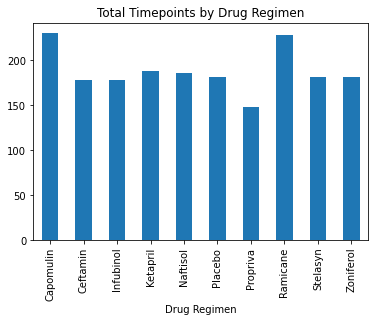

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_bar_pandas = timepoints_series.plot.bar(x="Drug Regimen", title = "Total Timepoints by Drug Regimen")

timepoints_bar_pandas

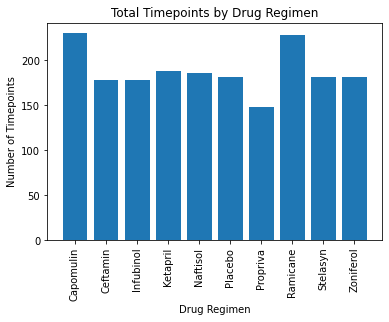

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints_bar_plt = plt.bar(x= drug_regimens, height = timepoints_series)

plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation = 90)

plt.show()

In [25]:
# Create data set for pie charts: the distribution of female and male mice

sex_distribution_series = clean_df["Sex"].value_counts()

sex_distribution_series

Male      958
Female    922
Name: Sex, dtype: int64

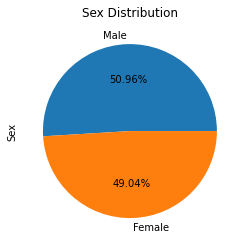

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution_pandas = sex_distribution_series.plot.pie(title = "Sex Distribution", autopct="%.2f%%")

<function matplotlib.pyplot.show(close=None, block=None)>

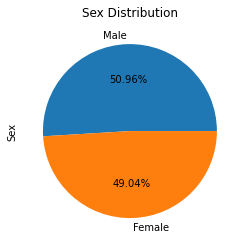

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_distribution_plt = plt.pie(sex_distribution_series, labels = ["Male", "Female"], autopct="%.2f%%")
plt.title("Sex Distribution")
plt.ylabel("Sex")


plt.show

### Quartiles and Outliers for Capomulin

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

In [29]:
# Get data for only Capomulin mice
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

In [30]:
# Group data by mouse, find the maximum timepoint for each mouse

cap_group = capomulin_df.groupby("Mouse ID")

cap_group_max_time = cap_group.max("Timepoint")

cap_group_max_time

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9,22,45,45.651331,2
b742,7,21,45,45.000000,0
f966,16,17,20,45.000000,0
g288,3,19,45,46.304003,1
g316,22,22,45,46.809225,2
i557,1,24,45,47.685963,1
i738,23,20,45,45.595685,2
j119,7,23,45,48.158209,1
j246,21,21,35,46.408361,1


In [31]:
# Extract data for box plot

cap_box_plot_data = cap_group_max_time["Tumor Volume (mm3)"]

cap_box_plot_data

Mouse ID
b128    45.651331
b742    45.000000
f966    45.000000
g288    46.304003
g316    46.809225
i557    47.685963
i738    45.595685
j119    48.158209
j246    46.408361
l509    48.070452
l897    46.154737
m601    45.000000
m957    46.414518
r157    46.539206
r554    45.781746
r944    47.373423
s185    45.000000
s710    45.000000
t565    46.749006
u364    47.212200
v923    45.704434
w150    45.000000
w914    45.893720
x401    45.473753
y793    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [32]:
# Find quartile values for Capomulin tumor volume data

cap_quartiles = list(cap_group_max_time["Tumor Volume (mm3)"].quantile(q=[0.25,0.5,0.75]))

cap_quartiles

[45.0, 45.89372032, 46.74900552]

In [33]:
# Find interquartile range for Capomulin tumor volume data

cap_iqr = cap_quartiles[2]-cap_quartiles[0]
cap_iqr

1.7490055199999972

In [34]:
# Find upper bound for outliers in Capomulin tumor volume data

cap_upper_bound = round(cap_quartiles[2] +  cap_iqr * 1.5, 6)
cap_upper_bound

49.372514

In [35]:
# Find lower bound for outliers in Capomulin tumor data

cap_lower_bound = round(cap_quartiles[0] - cap_iqr * 1.5, 6)
cap_lower_bound

42.376492

In [36]:
# Find if Capomulin tumor data has any outliers

cap_upper_outliers = cap_group_max_time.loc[cap_group_max_time["Tumor Volume (mm3)"] > cap_upper_bound]
print(cap_upper_outliers)

cap_lower_outliers = cap_group_max_time.loc[cap_group_max_time["Tumor Volume (mm3)"] < cap_lower_bound]
print(cap_lower_outliers)

Empty DataFrame
Columns: [Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


Because the dataframes are empty, I conclude that there aren't any potential outliers for the Capomulin tumor data

### Quartiles and Outliers for Ramicane

In [37]:
# Create dataframe of just Ramicane mice

ramicane_df = clean_df[clean_df["Drug Regimen"] == "Ramicane"]
ramicane_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [38]:
# Group data by mouse, find the maximum timepoint for each mouse

ram_group = ramicane_df.groupby("Mouse ID")

ram_group_max_time = ram_group.max("Timepoint")

ram_group_max_time

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a411,3,22,45,45.466677,1
a444,10,25,45,45.000000,0
a520,13,21,45,45.000000,1
a644,7,17,45,46.910892,1
c458,23,20,30,45.722279,2
c758,9,17,45,46.940945,1
d251,8,19,45,45.000000,2
e662,8,24,45,46.409084,2
g791,11,16,45,45.851531,1


In [39]:
# Extract data for box plot

ram_box_plot_data = ram_group_max_time["Tumor Volume (mm3)"]

ram_box_plot_data

Mouse ID
a411    45.466677
a444    45.000000
a520    45.000000
a644    46.910892
c458    45.722279
c758    46.940945
d251    45.000000
e662    46.409084
g791    45.851531
i177    45.000000
i334    45.000000
j913    45.252534
j989    46.343832
k403    45.000000
m546    45.000000
n364    45.521875
q597    45.766111
q610    46.585433
r811    45.625802
r921    45.568211
s508    45.000000
u196    47.622816
w678    45.000000
y449    46.378092
z578    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [40]:
# Find quartile values for Ramicane tumor volume data

ram_quartiles = list(ram_group_max_time["Tumor Volume (mm3)"].quantile(q=[0.25,0.5,0.75]))

ram_quartiles

[45.0, 45.52187471, 46.34383237]

In [41]:
# Find interquartile range for Ramicane tumor volume data

ram_iqr = ram_quartiles[2]-ram_quartiles[0]
ram_iqr

1.3438323700000012

In [42]:
# Find upper bound for outliers in Ramicane tumor volume data

ram_upper_bound = round(ram_quartiles[2] +  ram_iqr * 1.5, 6)
ram_upper_bound

48.359581

In [43]:
# Find lower bound for outliers in Ramicane tumor data

ram_lower_bound = round(ram_quartiles[0] - ram_iqr * 1.5, 6)
ram_lower_bound

42.984251

In [44]:
# Find if Ramicane tumor data has any outliers

ram_upper_outliers = ram_group_max_time.loc[ram_group_max_time["Tumor Volume (mm3)"] > ram_upper_bound]
print(ram_upper_outliers)

ram_lower_outliers = ram_group_max_time.loc[ram_group_max_time["Tumor Volume (mm3)"] < ram_lower_bound]
print(ram_lower_outliers)

Empty DataFrame
Columns: [Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


Because the dataframes are empty, I conclude that there are no potential outliers in the Ramicane tumor volume data

### Quartiles and Outliers for Infubinol

In [45]:
# Create dataframe of just Infubinol mice

infubinol_df = clean_df[clean_df["Drug Regimen"] == "Infubinol"]
infubinol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [46]:
# Group data by mouse, find the maximum timepoint for each mouse

inf_group = infubinol_df.groupby("Mouse ID")

inf_group_max_time = inf_group.max("Timepoint")

inf_group_max_time

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a203,20,23,45,67.973419,2
a251,21,25,45,65.525743,1
a577,6,25,30,57.031862,2
a685,8,30,45,66.083066,3
c139,11,28,45,72.226731,2
c326,18,25,5,45.000000,0
c895,7,29,30,60.969711,2
e476,23,26,45,62.435404,1
f345,23,26,45,60.918767,1


In [47]:
# Extract data for box plot

inf_box_plot_data = inf_group_max_time["Tumor Volume (mm3)"]

inf_box_plot_data

Mouse ID
a203    67.973419
a251    65.525743
a577    57.031862
a685    66.083066
c139    72.226731
c326    45.000000
c895    60.969711
e476    62.435404
f345    60.918767
i386    67.289621
k483    66.196912
k804    62.117279
m756    47.010364
n671    60.165180
o809    55.629428
o813    45.699331
q132    54.656549
s121    55.650681
v339    46.250112
v719    54.048608
v766    51.542431
w193    50.005138
w584    58.268442
y163    67.685569
z581    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [48]:
# Find quartile values for Infubinol tumor volume data

inf_quartiles = list(inf_group_max_time["Tumor Volume (mm3)"].quantile(q=[0.25,0.5,0.75]))

inf_quartiles

[54.04860769, 60.16518046, 65.52574285]

In [49]:
# Find interquartile range for Infubinol tumor volume data

inf_iqr = inf_quartiles[2]-inf_quartiles[0]
inf_iqr

11.477135160000003

In [50]:
# Find upper bound for outliers in Infubinol tumor volume data

inf_upper_bound = round(inf_quartiles[2] +  inf_iqr * 1.5, 6)
inf_upper_bound

82.741446

In [51]:
# Find lower bound for outliers in Infubinol tumor data

inf_lower_bound = round(inf_quartiles[0] - inf_iqr * 1.5, 6)
inf_lower_bound

36.832905

In [52]:
# Find if Infubinol tumor data has any outliers

inf_upper_outliers = inf_group_max_time.loc[inf_group_max_time["Tumor Volume (mm3)"] > inf_upper_bound]
print(inf_upper_outliers)

inf_lower_outliers = inf_group_max_time.loc[inf_group_max_time["Tumor Volume (mm3)"] < inf_lower_bound]
print(inf_lower_outliers)

Empty DataFrame
Columns: [Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


### Quartiles and Outliers for Ceftamin

In [53]:
# Create dataframe of just Ceftamin mice

ceftamin_df = clean_df[clean_df["Drug Regimen"] == "Ceftamin"]
ceftamin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [54]:
# Group data by mouse, find the maximum timepoint for each mouse

cef_group = ceftamin_df.groupby("Mouse ID")

cef_group_max_time = cef_group.max("Timepoint")

cef_group_max_time

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a275,20,28,45,62.999356,3
b447,2,30,0,45.000000,0
b487,6,28,25,56.057749,1
b759,12,25,30,55.742829,1
f436,3,25,15,48.722078,2
h531,5,27,5,47.784682,0
j296,24,30,45,61.849023,3
k210,15,28,45,68.923185,3
l471,7,28,45,67.748662,1


In [55]:
# Extract data for box plot

cef_box_plot_data = cef_group_max_time["Tumor Volume (mm3)"]

cef_box_plot_data

Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
h531    47.784682
j296    61.849023
k210    68.923185
l471    67.748662
l490    57.918381
l558    46.784535
l661    59.851956
l733    64.299830
o287    59.741901
p438    61.433892
q483    64.192341
t573    45.000000
u149    52.925348
u153    45.000000
w151    67.527482
x226    45.000000
x581    64.634949
x822    61.386660
y769    68.594745
y865    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [56]:
# Find quartile values for Ceftamin tumor volume data

cef_quartiles = list(cef_group_max_time["Tumor Volume (mm3)"].quantile(q=[0.25,0.5,0.75]))

cef_quartiles

[48.72207785, 59.85195552, 64.29983003]

In [57]:
# Find interquartile range for Ceftamin tumor volume data

cef_iqr = cef_quartiles[2]-cef_quartiles[0]
cef_iqr

15.577752179999997

In [58]:
# Find upper bound for outliers in Ceftamin tumor volume data

cef_upper_bound = round(cef_quartiles[2] +  cef_iqr * 1.5, 6)
cef_upper_bound

87.666458

In [59]:
# Find lower bound for outliers in Ceftamin tumor data

cef_lower_bound = round(cef_quartiles[0] - cef_iqr * 1.5, 6)
cef_lower_bound

25.35545

In [60]:
# Find if Ceftamin tumor data has any outliers

cef_upper_outliers = cef_group_max_time.loc[cef_group_max_time["Tumor Volume (mm3)"] > cef_upper_bound]
print(cef_upper_outliers)

cef_lower_outliers = cef_group_max_time.loc[cef_group_max_time["Tumor Volume (mm3)"] < cef_lower_bound]
print(cef_lower_outliers)

Empty DataFrame
Columns: [Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [61]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [62]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

In [63]:
# Find if there are potential outliers in Capomulin tumor data


In [64]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#iqr = third_q - first_q
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

NameError: name 'third_q' is not defined

## Box Plots for Drug Data

<function matplotlib.pyplot.show(close=None, block=None)>

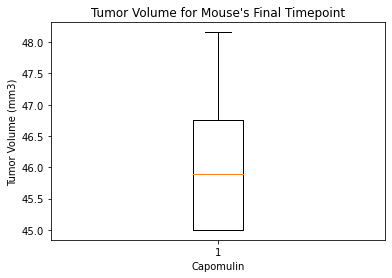

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(cap_box_plot_data)
plt.title("Tumor Volume for Mouse's Final Timepoint")
plt.xlabel("Capomulin")
plt.ylabel("Tumor Volume (mm3)")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

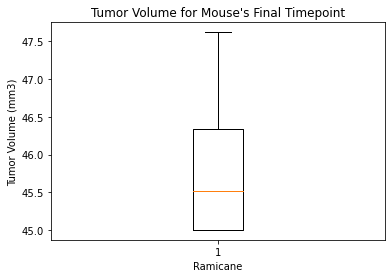

In [66]:
plt.boxplot(ram_box_plot_data)
plt.title("Tumor Volume for Mouse's Final Timepoint")
plt.xlabel("Ramicane")
plt.ylabel("Tumor Volume (mm3)")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

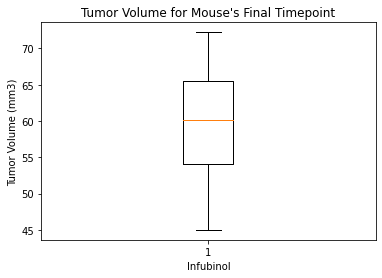

In [67]:
plt.boxplot(inf_box_plot_data)
plt.title("Tumor Volume for Mouse's Final Timepoint")
plt.xlabel("Infubinol")
plt.ylabel("Tumor Volume (mm3)")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

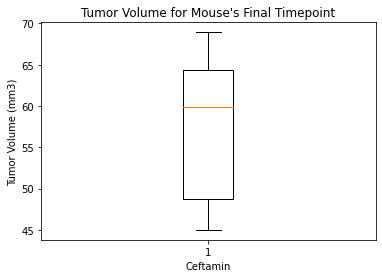

In [68]:
plt.boxplot(cef_box_plot_data)
plt.title("Tumor Volume for Mouse's Final Timepoint")
plt.xlabel("Ceftamin")
plt.ylabel("Tumor Volume (mm3)")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

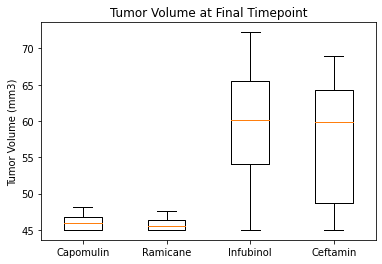

In [69]:
data_to_plot_together = [cap_box_plot_data, ram_box_plot_data, inf_box_plot_data, cef_box_plot_data]
x_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

plt.boxplot(data_to_plot_together, positions = [1, 2, 3, 4], labels = x_labels)
plt.title("Tumor Volume at Final Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show

## Line and Scatter Plots

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# I chose Mouse ID B724

b742_data = clean_df.loc[clean_df["Mouse ID"] == "b742"]
b742_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
296,b742,Capomulin,Male,7,21,30,39.167949,0
297,b742,Capomulin,Male,7,21,35,39.847576,0
298,b742,Capomulin,Male,7,21,40,38.255627,0
299,b742,Capomulin,Male,7,21,45,38.939633,0


In [71]:
x_values = b742_data["Timepoint"]

x_values

290     0
291     5
292    10
293    15
294    20
295    25
296    30
297    35
298    40
299    45
Name: Timepoint, dtype: int64

In [72]:
y_values = b742_data["Tumor Volume (mm3)"]

y_values

290    45.000000
291    41.534097
292    41.999228
293    39.524843
294    37.950355
295    38.617684
296    39.167949
297    39.847576
298    38.255627
299    38.939633
Name: Tumor Volume (mm3), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

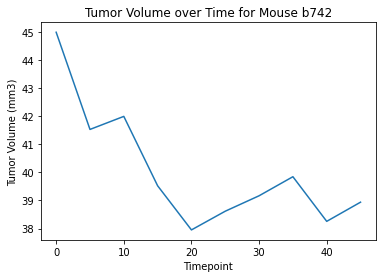

In [73]:
plt.plot(x_values, y_values)
plt.title("Tumor Volume over Time for Mouse b742")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show

In [89]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#average tumor volume

weight_cap = cap_group["Weight (g)"].mean()
weight_cap

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

In [91]:
avg_tumor_cap = cap_group["Tumor Volume (mm3)"].mean()

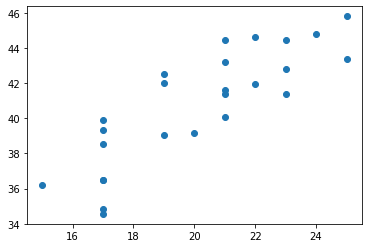

In [93]:
plt.scatter(weight_cap, avg_tumor_cap)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

